<a href="https://colab.research.google.com/github/speacock103/AIFall2019/blob/master/hw2/HW2P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Problem  1, Adding feature to MNIST data classification

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.5939 - acc: 0.8549 - val_loss: 0.3292 - val_acc: 0.9148
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3120 - acc: 0.9152 - val_loss: 0.2787 - val_acc: 0.9243
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2765 - acc: 0.9237 - val_loss: 0.2570 - val_acc: 0.9313
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2566 - acc: 0.9296 - val_loss: 0.2449 - val_acc: 0.9348
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2432 - acc: 0.9342 - val_loss: 0.2366 - val_acc: 0.9383
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2325 - acc: 0.9370 - val_loss: 0.2284 - val_acc: 0.9412
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2239 - acc: 0.9398 - val_loss: 0.2213 - val_acc

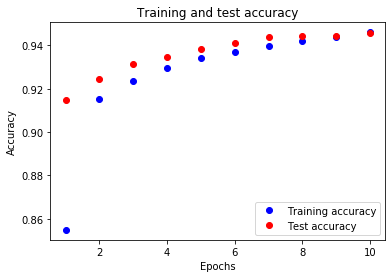

In [5]:
# First, the training and testing data will be loaded into variables and formated
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#before categorizing the labels, we will use them to add some additional features to the input vector of each image
#the feature I will be adding is the number of independent regions in an image besides the number. For the sake of runtime,
#the number of regions will be hardcoded for each number, with the assumption that each written digit is well formed
#thus the number of indepenent regions for a 0 would be 2, for a 1 would be 1, for a 2 would be 1, for a 3 would be 1,
#for a 4 would be 1, for a 5 would be 1, for a 6 would be 2, for a 7 would be 1, for a 8 would be 3, and for a 9 would be 2
train_images_withfeature = np.zeros((60000, 28 * 28 + 1))
test_images_withfeature = np.zeros((10000, 28 * 28 + 1))
for i in range(len(train_labels)):
  if (train_labels[i] == 0 or train_labels[i] == 6 or train_labels[i] == 9):
    num_regions = 2.0 / 3.0
  elif (train_labels[i] == 8):
    num_regions = 3.0 / 3.0
  else:
    num_regions = 1.0 / 3.0

  train_images_withfeature[i] = np.concatenate((train_images[i], num_regions), axis=None)

for i in range(len(test_labels)):
  if (test_labels[i] == 0 or test_labels[i] == 6 or test_labels[i] == 9):
    num_regions = 2.0 / 3.0
  elif (test_labels[i] == 8):
    num_regions = 3.0 / 3.0
  else:
    num_regions = 1.0 / 3.0

  test_images_withfeature[i] = np.concatenate((test_images[i], num_regions), axis=None)

#having used the labels to extract data, now categorize the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#with input vectors ready, and labels ready, can now construct the model
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28 + 1,)))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#the model has been constructed, now fit it with data
epochs = 10
results = model.fit(train_images_withfeature, train_labels, epochs=epochs, batch_size=128, validation_data=(test_images_withfeature, test_labels))

#view results of how the model handled data (plotting information derived form Dr. Wocjan's notebook on classifying MNIST digits)
history_dict = results.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As it can be seen, even though a simple model has been constructed with only one fully connected layer, just adding a single additional piece of information for each MNIST digit allowed for good training and validation accuray

# Same model without additional feature

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.6124 - acc: 0.8455 - val_loss: 0.3453 - val_acc: 0.9056
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3311 - acc: 0.9074 - val_loss: 0.3035 - val_acc: 0.9155
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3017 - acc: 0.9155 - val_loss: 0.2887 - val_acc: 0.9190
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2882 - acc: 0.9191 - val_loss: 0.2811 - val_acc: 0.9211
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.2799 - acc: 0.9224 - val_loss: 0.2737 - val_acc: 0.9229
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2741 - acc: 0.9241 - val_loss: 0.2740 - val_acc: 0.9254
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.2701 - acc: 0.9250 - val_loss: 0.2690 - val_acc

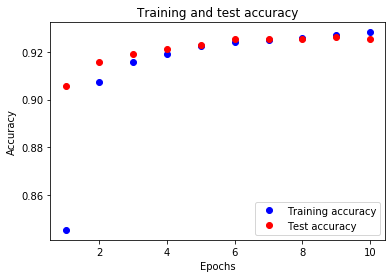

In [6]:
# First, the training and testing data will be loaded into variables and formated
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#with input vectors ready, and labels ready, can now construct the model
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#the model has been constructed, now fit it with data
epochs = 10
results = model.fit(train_images, train_labels, epochs=epochs, batch_size=128, validation_data=(test_images, test_labels))

#view results of how the model handled data (plotting information derived form Dr. Wocjan's notebook on classifying MNIST digits)
history_dict = results.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Here, the same exact model is taken from above (a single fully connected layer), however without the additional feature added. It is seen the accuracy falls a couple percent lower than with the feature of the number of independet regions aside from the number